In [ ]:
!pip install transformers sentencepiece


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import MarianMTModel, MarianTokenizer


In [ ]:
texts = [
    "I absolutely loved the clean design of the application.",
    "The customer support response was slow and disappointing.",
    "This machine learning course explains complex ideas very clearly.",
    "Waiting for the update ruined my overall experience.",
    "The product quality exceeded my expectations by a lot.",
    "I regret buying this service due to frequent errors.",
    "The new feature improved the performance significantly.",
    "Poor network connectivity makes the app frustrating to use.",
    "The interface feels intuitive and user friendly.",
    "Technical glitches caused repeated failures during checkout."
]

df = pd.DataFrame({"Text": texts})
df


,Text
0,I absolutely loved the clean design of the app...
1,The customer support response was slow and dis...
2,This machine learning course explains complex ...
3,Waiting for the update ruined my overall exper...
4,The product quality exceeded my expectations b...
5,I regret buying this service due to frequent e...
6,The new feature improved the performance signi...
7,Poor network connectivity makes the app frustr...
8,The interface feels intuitive and user friendly.
9,Technical glitches caused repeated failures du...


In [ ]:
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)


/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
def translate_sentence(sentence, tokenizer, model):
    inputs = tokenizer([sentence], return_tensors="pt", padding=True)
    translated = model.generate(**inputs)
    translated_text = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    return translated_text[0]



In [ ]:
df["Translated"] = df["Text"].apply(lambda x: translate_sentence(x, tokenizer, model))
df



,Text,Translated
0,I absolutely loved the clean design of the app...,J'ai adoré le design propre de l'application.
1,The customer support response was slow and dis...,La réponse du service client a été lente et dé...
2,This machine learning course explains complex ...,Ce cours d'apprentissage automatique explique ...
3,Waiting for the update ruined my overall exper...,L'attente de la mise à jour a ruiné mon expéri...
4,The product quality exceeded my expectations b...,La qualité du produit a largement dépassé mes ...
5,I regret buying this service due to frequent e...,Je regrette d'acheter ce service en raison d'e...
6,The new feature improved the performance signi...,La nouvelle fonctionnalité a grandement amélio...
7,Poor network connectivity makes the app frustr...,Une mauvaise connectivité réseau rend l'applic...
8,The interface feels intuitive and user friendly.,L'interface se sent intuitive et conviviale.
9,Technical glitches caused repeated failures du...,Les problèmes techniques ont causé des défaill...


In [ ]:
import math

def translation_confidence(sentence, tokenizer, model):
    inputs = tokenizer([sentence], return_tensors="pt", padding=True)
    output = model.generate(**inputs, output_scores=True, return_dict_in_generate=True)
    log_prob = float(output.sequences_scores[0].detach())
    confidence = math.exp(log_prob)  # convert log-prob to 0-1
    return confidence

df["Confidence_Score"] = df["Text"].apply(lambda x: translation_confidence(x, tokenizer, model))
df


,Text,Translated,Confidence_Score
0,I absolutely loved the clean design of the app...,J'ai adoré le design propre de l'application.,0.722852
1,The customer support response was slow and dis...,La réponse du service client a été lente et dé...,0.690037
2,This machine learning course explains complex ...,Ce cours d'apprentissage automatique explique ...,0.761569
3,Waiting for the update ruined my overall exper...,L'attente de la mise à jour a ruiné mon expéri...,0.667516
4,The product quality exceeded my expectations b...,La qualité du produit a largement dépassé mes ...,0.714869
5,I regret buying this service due to frequent e...,Je regrette d'acheter ce service en raison d'e...,0.768808
6,The new feature improved the performance signi...,La nouvelle fonctionnalité a grandement amélio...,0.584169
7,Poor network connectivity makes the app frustr...,Une mauvaise connectivité réseau rend l'applic...,0.773502
8,The interface feels intuitive and user friendly.,L'interface se sent intuitive et conviviale.,0.801238
9,Technical glitches caused repeated failures du...,Les problèmes techniques ont causé des défaill...,0.561522


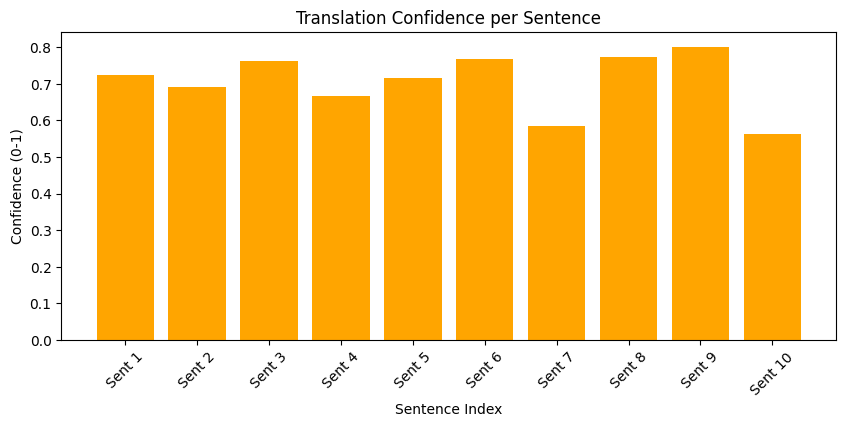

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(df.index, df["Confidence_Score"], color="orange")
plt.title("Translation Confidence per Sentence")
plt.xlabel("Sentence Index")
plt.ylabel("Confidence (0-1)")
plt.xticks(df.index, [f"Sent {i+1}" for i in df.index], rotation=45)
plt.show()
